In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=58787cadda01ab95a9ed86971cb3fa7d244147343cad6151eea2cf8aed8feacf
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#### If working in local machine, google colab please use below code
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("WordFrequency").getOrCreate()
# spark
spark_context = spark.sparkContext

### If working in Instances please use below code
# from pyspark.sql import SparkSession
# from operator import add

# spark_session = SparkSession\
#         .builder\
#         .master("spark://192.168.2.250:7077") \
#         .appName("Group_17")\
#         .config("spark.dynamicAllocation.enabled", True)\
#         .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
#         .config("spark.shuffle.service.enabled", False)\
#         .config("spark.dynamicAllocation.executorIdleTimeout","240s")\
#         .config("spark.executor.cores",2)\
#         .config("spark.driver.port",9999)\
#         .config("spark.blockManager.port",10005)\
#         .getOrCreate()

# # RDD API
# spark_context = spark_session.sparkContext

# spark_context.setLogLevel("OFF")
# json_file_path = 'new_small_corpus-webis-tldr-17.json'
# df = spark.read.json(f"hdfs://192.168.2.250:9000/{json_file_path}")




In [ ]:
from pyspark.sql.functions import explode, split, desc, col, lower, when
from pyspark.ml.feature import StopWordsRemover
# Specify the path to your large JSON file
json_file_path = 'new_small_corpus-webis-tldr-17.json'

df = spark.read.json(json_file_path)

# print(df.take(1))
# Explode the array of words in the "content" column
# Split the 'content' column into an array of words
df_split = df.withColumn("content_array", split(col("content"), " "))

# print(df_split.take(1))
# Explode the array of words in the "content" column
df_exploded = df_split.select("id", "subreddit", explode("content_array").alias("word"))
# df_exploded.take(10)

# Apply the logic to preserve "I" and convert other words to lowercase
df_exploded_lower = df_exploded.withColumn("word", when(col("word") == "I", col("word")).otherwise(lower(col("word"))))
# df_exploded_lower.take(10)
# Filter out non-alphanumeric and null or spaces tokens if needed
df_filtered = df_exploded_lower.filter(~col("word").rlike("[^a-zA-Z0-9]")).filter(col("word").isNotNull() & (col("word") != ""))

# df_filtered.take(20)
## filter out stopwords
stop_words = StopWordsRemover().getStopWords()
df_filtered_stopWords = df_filtered.filter(~col("word").isin(stop_words))
# df_filtered_stopWords.take(10)

word_frequencies = df_filtered_stopWords.groupBy("word").count().sort(desc("count"))
# Show the top words and their frequencies
word_frequencies.show()

+------+-----+
|  word|count|
+------+-----+
|     I| 4706|
|  like|  670|
|   get|  644|
|   one|  578|
|people|  478|
|  even|  372|
|really|  370|
|  know|  369|
|  time|  355|
|  make|  322|
| going|  312|
| think|  311|
|    go|  302|
|  want|  295|
|   got|  290|
|  much|  289|
|  good|  277|
|  back|  263|
|   see|  258|
| first|  256|
+------+-----+
only showing top 20 rows



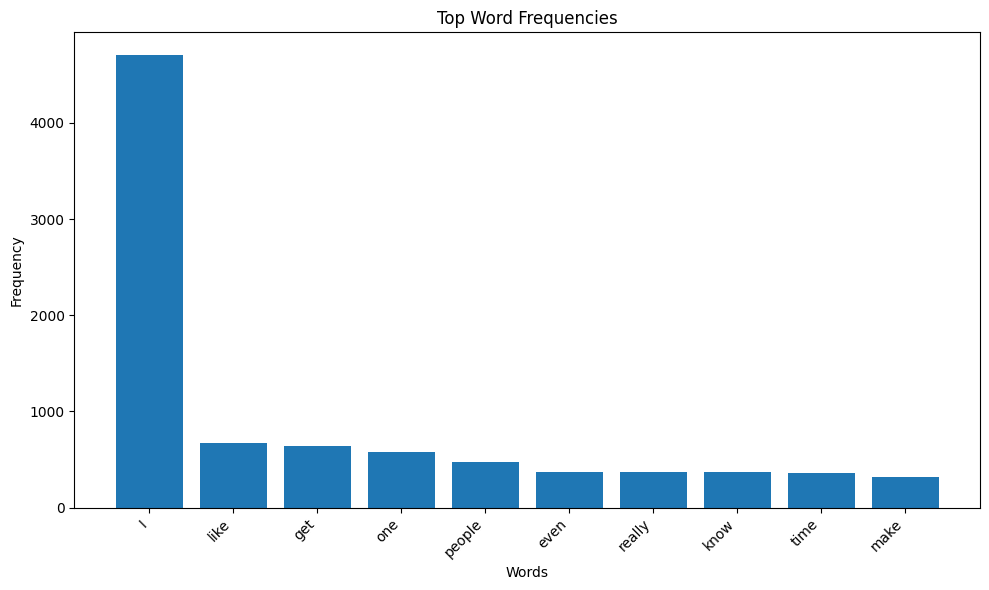

In [ ]:
# Convert PySpark DataFrame to Pandas DataFrame for local plotting
pandas_df = word_frequencies.limit(10).toPandas()

# Plot the top word frequencies
plt.figure(figsize=(10, 6))
plt.bar(pandas_df["word"], pandas_df["count"])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Word Frequencies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
!pip install --upgrade pandas --user


  Using cached https://files.pythonhosted.org/packages/79/87/8bb36bd4ebae147612c73d1bdc1385db7beebb9eb141c4bfefb33f52c87c/pandas-1.1.5-cp36-cp36m-win_amd64.whl
Requirement not upgraded as not directly required: python-dateutil>=2.7.3 in c:\programdata\anaconda3\lib\site-packages (from pandas) (2.7.3)
  Using cached https://files.pythonhosted.org/packages/ea/bc/da526221bc111857c7ef39c3af670bbcf5e69c247b0d22e51986f6d0c5c2/numpy-1.19.5-cp36-cp36m-win_amd64.whl
Requirement not upgraded as not directly required: pytz>=2017.2 in c:\programdata\anaconda3\lib\site-packages (from pandas) (2018.4)
Requirement not upgraded as not directly required: six>=1.5 in c:\programdata\anaconda3\lib\site-packages (from python-dateutil>=2.7.3->pandas) (1.11.0)


  The script f2py.exe is installed in 'C:\Users\karthik\AppData\Roaming\Python\Python36\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
